In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from face import BaseFACE, FACE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, pdist
from scipy.stats import gaussian_kde
import networkx as nx

In [2]:
data = pd.DataFrame(np.load('toy_example/data.npy'), columns=['x', 'y'])
with open('toy_example/model.pkl', 'rb') as f:
    clf = pickle.load(f)
eg1 = data.iloc[0].values
eg2 = np.array([-1, -1])

01:00:35 INFO: Graph has been created with 250 nodes.
01:00:40 INFO: 3964 edges have been added to graph.
01:00:40 INFO: 3 nodes removed as unconnected. Graph now has 247
01:00:40 INFO: Generating counterfactual for instance [-3.82359477 -0.94196626] using <class 'face.BaseFACE'>.
01:00:40 INFO: 118 potential counterfactuals.
01:00:41 INFO: Generating counterfactual for instance [-1 -1] using <class 'face.BaseFACE'>.
01:00:41 INFO: 1 node has been added to graph. Graph now has 248 nodes.
01:00:41 INFO: 20 edges have been added to graph.
01:00:41 INFO: 118 potential counterfactuals.


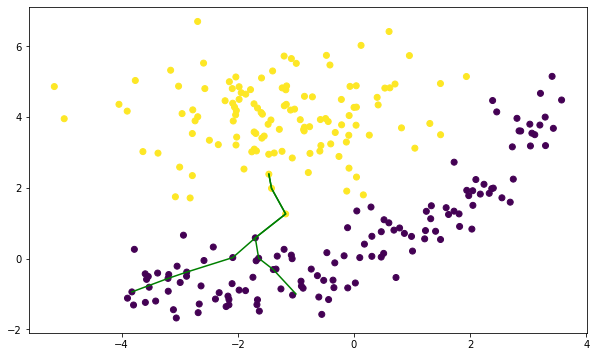

In [3]:
ce = BaseFACE(data, clf, dist_threshold=0.9, pred_threshold=0.99)
path1, pred1 = ce.generate_counterfactual(eg1)
path2, pred2 = ce.generate_counterfactual(eg2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data['x'], data['y'], c=clf.predict(data))
ax.plot(path1['x'], path1['y'], 'green')
ax.plot(path2['x'], path2['y'], 'green')

01:00:41 INFO: Graph has been created with 250 nodes.
01:00:50 INFO: 3964 edges have been added to graph.
01:00:50 INFO: 3 nodes removed as unconnected. Graph now has 247
01:00:50 INFO: 18 nodes removed due to low density. Graph now has 229
01:00:50 INFO: Generating counterfactual for instance [-3.82359477 -0.94196626] using <class 'face.FACE'>.
01:00:50 INFO: 103 potential counterfactuals.
01:00:50 INFO: Generating counterfactual for instance [-1 -1] using <class 'face.FACE'>.
01:00:50 INFO: 1 node has been added to graph. Graph now has 230 nodes.
01:00:51 INFO: 20 edges have been added to graph.
01:00:51 INFO: 103 potential counterfactuals.


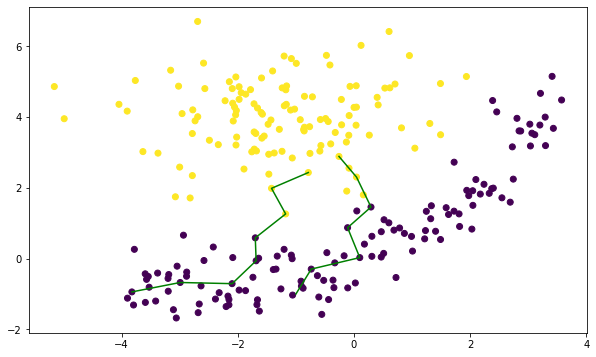

In [4]:
ce = FACE(data, clf, dist_threshold=0.9, pred_threshold=0.99, density_threshold=0.01)
path1, pred1 = ce.generate_counterfactual(eg1)
path2, pred2 = ce.generate_counterfactual(eg2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data['x'], data['y'], c=clf.predict(data))
ax.plot(path1['x'], path1['y'], 'green')
ax.plot(path2['x'], path2['y'], 'green')

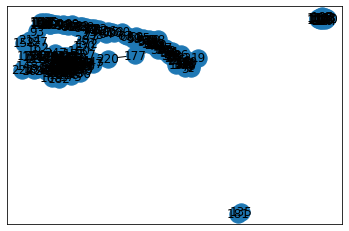

In [14]:
nx.draw_networkx(ce.G)

In [5]:
adult = pd.read_csv('../Tom/adult.csv', index_col=0, nrows=1e3)
x_adult = adult[['age', 'education', 'sex', 'weekly-hours']].values
y_adult = adult[['compensation']].values.squeeze()
scaler = StandardScaler().fit(x_adult)
x_adult = scaler.transform(x_adult)
svm = SVC(probability=True)
svm.fit(x_adult, y_adult)
print(svm.score(x_adult, y_adult))

0.799


In [6]:
np.save('adult/data', x_adult)
with open('adult/model.pkl', 'wb') as file:
    pickle.dump(svm, file)
with open('adult/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [7]:
data = pd.DataFrame(np.load('adult/data.npy'), columns=['age', 'education', 'sex', 'weekly-hours'])
with open('adult/model.pkl', 'rb') as f:
    clf = pickle.load(f)
with open('adult/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [11]:
ce = BaseFACE(data, clf, dist_threshold=0.5, pred_threshold=0.75)
eg = data.iloc[0].values
path, pred = ce.generate_counterfactual(eg)
pd.DataFrame(scaler.inverse_transform(path), columns=list(data))

09:10:52 INFO: Graph has been created with 1000 nodes.
09:12:03 INFO: 21762 edges have been added to graph.
09:12:03 INFO: Generating counterfactual for instance [ 0.07430595 -0.92967404  0.68441857 -0.05568378] using <class 'face.BaseFACE'>.
09:12:03 INFO: 55 potential counterfactuals.


,age,education,sex,weekly-hours
0,39.0,1.0,1.0,40.0
1,39.0,1.0,1.0,45.0
2,42.0,1.0,1.0,50.0


In [12]:
ce = FACE(data, clf, dist_threshold=0.5, density_threshold=0.01, pred_threshold=0.75)
path, pred = ce.generate_counterfactual(eg)
pd.DataFrame(scaler.inverse_transform(path), columns=list(data))

09:12:03 INFO: Graph has been created with 1000 nodes.
09:12:03 INFO: 352 nodes removed due to low density.
09:12:38 INFO: 20500 edges have been added to graph.
09:12:38 INFO: Generating counterfactual for instance [ 0.07430595 -0.92967404  0.68441857 -0.05568378] using <class 'face.FACE'>.
09:12:38 INFO: 39 potential counterfactuals.


,age,education,sex,weekly-hours
0,39.0,1.0,1.0,40.0
1,39.0,1.0,1.0,45.0
2,42.0,1.0,1.0,50.0
